In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [46]:
# Load all the existing datasets
data_2 = pd.read_csv("data_oww_2.csv")
data_3 = pd.read_csv("data_oww_3.csv")
data_4 = pd.read_csv("data_oww_4.csv")
data_5 = pd.read_csv("data_oww_5.csv")

In [3]:
# Check the first few rows of the 5-digit solver results
data_5.head()

,node,node_bef_goal,path,path_len,time
0,10000,14044,RRDR,4,0.01
1,10001,14301,RU-RD,5,0.03
2,10002,14044,DR,2,0.00
3,10003,14301,U-URRD,6,0.11
4,10004,14044,LLR,3,0.01


In [7]:
data_5["path_len"].mean()

4.6665123456790125

In [6]:
data_5["time"].sum()

492.1979923248073

In [8]:
data_5["node_bef_goal"].value_counts()

14044    1116
14024     943
11044     663
24044     608
11024     584
14301     554
24024     431
10325     361
21044     353
21024     332
10125     281
10525     205
23451      48
0           1
Name: node_bef_goal, dtype: int64

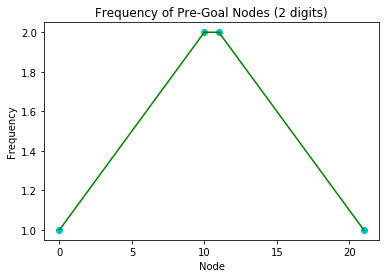

In [139]:
d2_nodes = data_2["node_bef_goal"].value_counts().to_frame().reset_index()
d2_nodes.columns = ["node", "freq"]
d2_nodes = d2_nodes.sort_values(by=["node"])

plt.plot(d2_nodes["node"], d2_nodes["freq"], "co")
plt.plot(d2_nodes["node"], d2_nodes["freq"], "g-")
plt.title("Frequency of Pre-Goal Nodes (2 digits)")

plt.xlabel("Node")
plt.ylabel("Frequency")

plt.show()

# Interesting how balanced the frequency is at base case

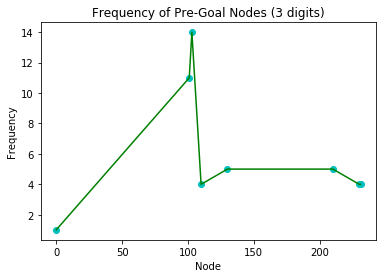

In [138]:
d3_nodes = data_3["node_bef_goal"].value_counts().to_frame().reset_index()
d3_nodes.columns = ["node", "freq"]
d3_nodes = d3_nodes.sort_values(by=["node"])

plt.plot(d3_nodes["node"], d3_nodes["freq"], "co")
plt.plot(d3_nodes["node"], d3_nodes["freq"], "g-")
plt.title("Frequency of Pre-Goal Nodes (3 digits)")

plt.xlabel("Node")
plt.ylabel("Frequency")

plt.show()

# One spike somewhere in the 100 node; otherwise, the rest of the plot is somewhat level

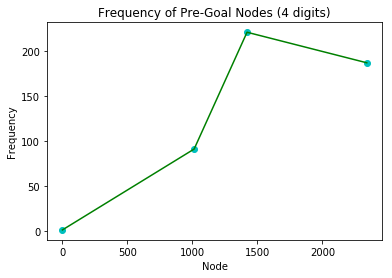

In [137]:
d4_nodes = data_4["node_bef_goal"].value_counts().to_frame().reset_index()
d4_nodes.columns = ["node", "freq"]
d4_nodes = d4_nodes.sort_values(by=["node"])

plt.plot(d4_nodes["node"], d4_nodes["freq"], "co")
plt.plot(d4_nodes["node"], d4_nodes["freq"], "g-")
plt.title("Frequency of Pre-Goal Nodes (4 digits)")

plt.xlabel("Node")
plt.ylabel("Frequency")

plt.show()

# Another smooth plot; seems characteristic of games with even-numbered digits

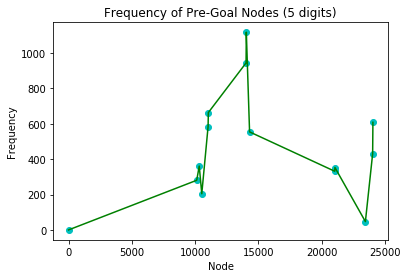

In [136]:
d5_nodes = data_5["node_bef_goal"].value_counts().to_frame().reset_index()
d5_nodes.columns = ["node", "freq"]
d5_nodes = d5_nodes.sort_values(by=["node"])

plt.plot(d5_nodes["node"], d5_nodes["freq"], "co")
plt.plot(d5_nodes["node"], d5_nodes["freq"], "g-")
plt.title("Frequency of Pre-Goal Nodes (5 digits)")

plt.xlabel("Node")
plt.ylabel("Frequency")

plt.show()

# Several spikes occurring mostly at nodes divisible by 5000

In [68]:
# Average solution length per total solve time
avg_velocity = []

avg_velocity.append([2, data_2["path_len"].mean(), data_2["time"].sum()])
avg_velocity.append([3, data_3["path_len"].mean(), data_3["time"].sum()])
avg_velocity.append([4, data_4["path_len"].mean(), data_4["time"].sum()])
avg_velocity.append([5, data_5["path_len"].mean(), data_5["time"].sum()])

avg_velocity = np.array(avg_velocity)

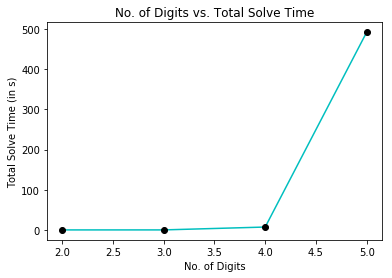

In [149]:
plt.plot(avg_velocity[:,0], avg_velocity[:,2], "c-")
plt.plot(avg_velocity[:,0], avg_velocity[:,2], "ko")
plt.title("No. of Digits vs. Total Solve Time")

plt.xlabel("No. of Digits")
plt.ylabel("Total Solve Time (in s)")

plt.show()

# Direct Proportion as expected

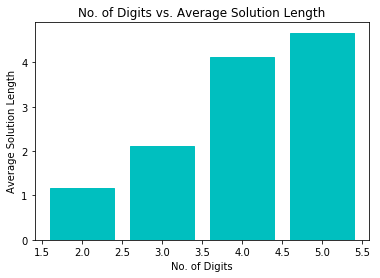

In [135]:
bar = plt.bar(avg_velocity[:,0], avg_velocity[:,1])
plt.title("No. of Digits vs. Average Solution Length")

for i in range(len(avg_velocity[:,0])):
    bar[i].set_color('c')

plt.xlabel("No. of Digits")
plt.ylabel("Average Solution Length")

plt.show()

# Again, Direct Proportion

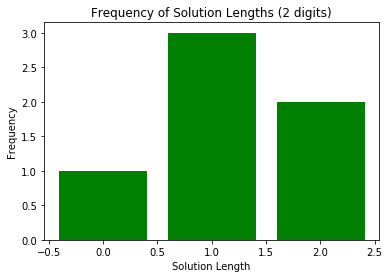

In [127]:
d2_nodes = data_2["path_len"].value_counts().to_frame().reset_index()
d2_nodes.columns = ["length", "freq"]
d2_nodes = d2_nodes.sort_values(by=["length"])

bar = plt.bar(d2_nodes["length"], d2_nodes["freq"])
plt.title("Frequency of Solution Lengths (2 digits)")

for i in range(len(d2_nodes["length"])):
    bar[i].set_color('g')

plt.xlabel("Solution Length")
plt.ylabel("Frequency")

plt.show()

# Shape of bar graph reveals a right-skew...

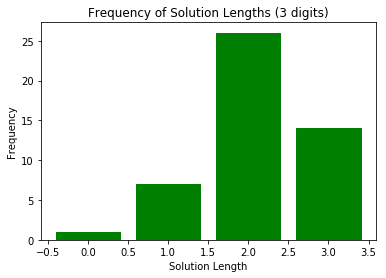

In [128]:
d3_nodes = data_3["path_len"].value_counts().to_frame().reset_index()
d3_nodes.columns = ["length", "freq"]
d3_nodes = d3_nodes.sort_values(by=["length"])

bar = plt.bar(d3_nodes["length"], d3_nodes["freq"])
plt.title("Frequency of Solution Lengths (3 digits)")

for i in range(len(d3_nodes["length"])):
    bar[i].set_color('g')

plt.xlabel("Solution Length")
plt.ylabel("Frequency")

plt.show()

# ...which becomes more apparent...

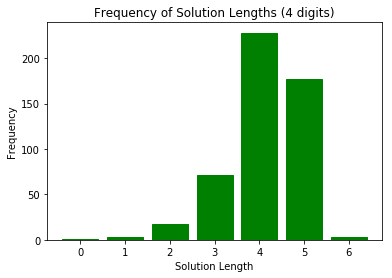

In [129]:
d4_nodes = data_4["path_len"].value_counts().to_frame().reset_index()
d4_nodes.columns = ["length", "freq"]
d4_nodes = d4_nodes.sort_values(by=["length"])

bar = plt.bar(d4_nodes["length"], d4_nodes["freq"])
plt.title("Frequency of Solution Lengths (4 digits)")

for i in range(len(d4_nodes["length"])):
    bar[i].set_color('g')

plt.xlabel("Solution Length")
plt.ylabel("Frequency")

plt.show()

# ...as more and more digits are involved

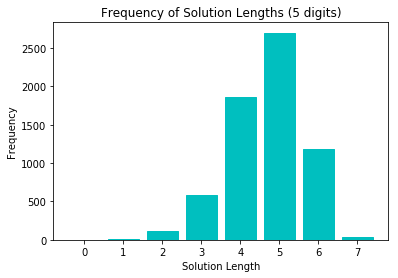

In [130]:
d5_nodes = data_5["path_len"].value_counts().to_frame().reset_index()
d5_nodes.columns = ["length", "freq"]
d5_nodes = d5_nodes.sort_values(by=["length"])

bar = plt.bar(d5_nodes["length"], d5_nodes["freq"])
plt.title("Frequency of Solution Lengths (5 digits)")

for i in range(len(d5_nodes["length"])):
    bar[i].set_color('c')

plt.xlabel("Solution Length")
plt.ylabel("Frequency")

plt.show()

# The highest skew occurs immediately to the right of the midpoint

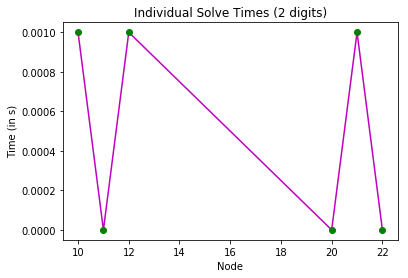

In [184]:
plt.plot(data_2["node"], data_2["time"], "m-")
plt.plot(data_2["node"], data_2["time"], "go")
plt.title("Individual Solve Times (2 digits)")

plt.xlabel("Node")
plt.ylabel("Time (in s)")

plt.show()

# Fairly straightforward; points easily identifiable

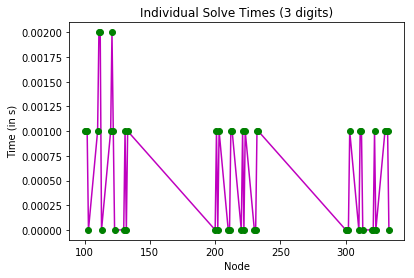

In [185]:
plt.plot(data_3["node"], data_3["time"], "m-")
plt.plot(data_3["node"], data_3["time"], "go")
plt.title("Individual Solve Times (3 digits)")

plt.xlabel("Node")
plt.ylabel("Time (in s)")

plt.show()

# Endpoints also obvious

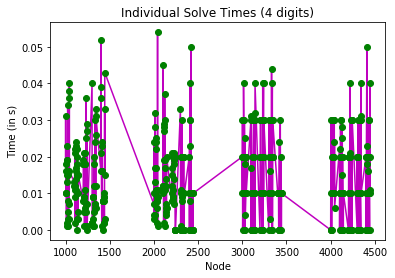

In [189]:
plt.plot(data_4["node"], data_4["time"], "m-")
plt.plot(data_4["node"], data_4["time"], "go")
plt.title("Individual Solve Times (4 digits)")

plt.xlabel("Node")
plt.ylabel("Time (in s)")

plt.show()

# Clusters form before the midpoint, but the right half retain the end-to-end property of its smaller-digit solutions

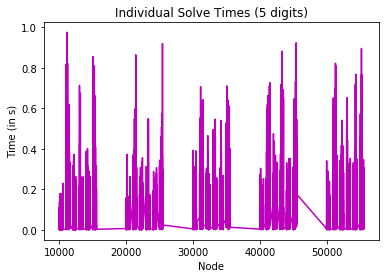

In [187]:
plt.plot(data_5["node"], data_5["time"], "m-")
#plt.plot(data_5["node"], data_5["time"], "go")
plt.title("Individual Solve Times (5 digits)")

plt.xlabel("Node")
plt.ylabel("Time (in s)")

plt.show()

# Enabling points show that clusters form below the 0.4 s mark